# Projekt 1 – perceptron Rosenblatta

## Temat: płytka sieć do nauki problemu XOR


#### Autorzy projektu:
* Sebastian Żółkiewicz, 259337
* Piotr Kulczycki, 259257
#### Zajęcia:
*    Algorytmy uczenia maszynowego W04ISA-SM0004G
#### Grupa:
*    nr 1, co drugi wtorek (parzyste), 9:15 - 11:00
#### Prowadzący:
*    mgr inż. Michał Zmonarski


## Zrealizowane założenia projektu

* Krótki opis problemu
* Opis zaimplementowanych funkcji
* Opis zaimplementowanych zmiennych i stałych
* Wykresy błędu MSE (błędu średniokwadratowego) w obu warstwach (na przykładach uczących oraz na całym zbiorze uczącym)
* wykresy błędu klasyfikacji (przyjmujemy próg 0.5 dla klasyfikacji 0-1)
* wykresy wag w obu warstwach.

* szybsze kończenie uczenia przy spadku MSE poniżej zadanej wartości,
* dodanie mini-batch.


## Mini kanban:
### Waiting
* dodanie momentum,
* adaptacyjny współczynnik uczenia

### In progres

### Ready
* Wykresy błędu MSE - dla całego ciągu uczącego 
* Dodać opisy zdjęć - skąd są
* ujednolicić nazwy zmiennych
* nazwa dla learn
* Opis zaimplementowanych funkcji - dopieścić
* Opis zaimplementowanych zmiennych i stałych - eze

### Done
* Zaimplelentować mini - batche 
* Wykresy błędu MSE    - dla warstwy ukrytej MSE
* Wykresy błędu MSE - dla przykładu uczącego
* szybsze kończenie uczenia przy spadku MSE poniżej zadanej wartości
* wykresy błędu klasyfikacji
* wykresy błędu klasyfikacji (przyjmujemy próg 0.5 dla klasyfikacji 0-1)
* Krótki opis problemu
* wykresy wag w obu warstwach.

## Część teoretyczna


### Opis Problemu - MLP for XOR problem
Problem XOR (Exclusive OR) stanowi kluczowy problem w uczeniu maszynowym, który ilustruje wyzwania związane z tworzeniem modeli opartych na neuronach lub sieciach neuronowych.

XOR to logiczna operacja, która zwraca prawdę (1) tylko wtedy, gdy jedno z wejść jest prawdziwe, a drugie fałszywe.

![Bramka XOR](./photos/XOR_tabela_prawdy.png )
 
*Zdj. 1. Tabela prawdy dla XOR - źródło https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7*


Problem polega na tym, że XOR nie jest liniowo separowalny - oznacza to, że nie można podzielić przestrzeni wejść linią (linią prostą w dwóch wymiarach lub płaszczyzną w trzech wymiarach), aby poprawnie oddzielić przypadki prawdziwe od fałszywych.

![Przestrzeń cech XOR](./photos/XOR_przestrzen_wejsc.png)

*Zdj. 2. Wykres wyjść dla XOR - źródło https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7*



Tradycyjne modele liniowe, takie jak regresja logistyczna czy perceptron, nie są w stanie modelować funkcji XOR, ponieważ nie mogą stworzyć odpowiedniego podziału przestrzeni wejść. Jednak sieci neuronowe z warstwą ukrytą potrafią rozwiązać ten problem poprzez tworzenie nieliniowych kombinacji wejść. Wprowadzenie warstwy ukrytej pozwala na stworzenie odpowiednich granic decyzyjnych w przestrzeni cech, umożliwiając modelowi na nauczenie się funkcji XOR.

![Rozwiązanie XOR za pomocą MLP](./photos/rozw_problemuXOR_MLP.png)

*Zdj. 3. Poprawny sposób klasyfikacji wyjść dla XOR - źródło https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7*


W celu sprawnego nauczenia sieci i przedstawienia skondensowanych wyników, sieć domyślnie jest uczona 4 przypadków jednocześnie, tj zbierane są gradienty dla każdego przypdadku wejścia XOR i zmiany dW1, db1, dW2, db2 są wszystkie nakładane jednocześnie.  

## Projekt sieci

### Schemat
tu wklejam schemat

Sieć jest zbudowana z 2 warstw. Dla obu warstw wybrano funkcje aktywacji sigmoid. Sieć ma 2 wejścia i jedno wyjście przyjmujące wartości z zakresu od 0 do 1. Warstwa ukryta składa się z 2 neuronów.

### Funkcja aktywacji
tu wklejam wzorek
tu wklejam zdjęcie

### Parametry sieci
#### Wzory
**Propagacja**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = \text{σ}(Z^{[1]})$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = \text{σ}(Z^{[2]})$$

**Backward propagation**

$$dA^{[2]} = A^{[2]} - Y$$
$$dZ^{[2]} = dA^{[2]} .* \text{σ}^{\prime} (z^{[2]})$$
$$dW^{[2]} = dZ^{[2]} A^{[1]T}$$
$$dB^{[1]} = \Sigma {dZ^{[1]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* \text{σ}^{\prime} (z^{[1]})$$
$$dW^{[1]} = dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - lr *  dW^{[2]}$$
$$b^{[2]} := b^{[2]} - lr *  db^{[2]}$$
$$W^{[1]} := W^{[1]} - lr *  dW^{[1]}$$
$$b^{[1]} := b^{[1]} - lr *  db^{[1]}$$


## Implementacja sieci

In [66]:
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

In [67]:
now = datetime.now().second
np.random.seed(now)

In [68]:
# funckja get_data_batch
# na podstawie zadanej wielkości zwraca przykłąd uczący o zadanej wielkości
#
# Opis przyjmowenych zmiennych:
#   X             -   ciąg uczący X lub zwrócona wcześniej zmienna X
#   Y             -   ciąg uczący Y lub zwrócona wcześniej zmienna Y
#   batch         -   zadana wielkość przykłądu uczącego
#
# Opis zwracanych zmiennych
#   X             - pomocnicza zmienna X, należy przekazać do funkcji w kolejnej iteracji
#   Y             - pomocnicza zmienna Y, należy przekazać do funkcji w kolejnej iteracji
#   np.array(X_)  - przykład uczący X o zadanej wielkości batch
#   np.array(Y_)  - przykład uczący Y o zadanej wielkości batch

def get_data_batch(X,Y,batch):
    X_ = []
    Y_ = []
    for _ in range(0,batch):
        X_.append(X[0])
        X = np.delete(X,0,0)
        if len(X) == 0:
            X = np.array([[0,0],[0,1],[1,0],[1,1]])
        Y_.append(Y[0])
        Y = np.delete(Y,0,0)
        if len(Y) == 0:
            Y = np.array([[0],[1],[1],[0]])
    
    return X, Y, np.array(X_),np.array(Y_)


Funkcja aktywacji i jej pochodna 

In [69]:
# funkcja sigmoid
# funkcja aktywacji używana dla każdego neuronu
def sigmoid(x): 
	return 1.0/(1.0 + np.exp(-x))

# funkcja sigmoid_prime
# pochodna funkcji aktywacji używana przy obliczaniu wag w propagacji wstecznej
def sigmoid_prime(x): 
    return x * (1 - x)

Parametry poczatkowe - wagi i bajasy

In [70]:
# funckja initialize_params
# inicjalizacja wag i baiasów w sposób losowy o wartościach od -0.5 do 0.5
# wartości losowe aby przełamać symetrie 
#
# Opis zwracanych zmiennych
#   W1            - wagi początkowe dla 1. warstwy sieci
#   b1            - bajasy początkowe dla 1. warstwy sieci
#   W2            - wagi początkowe dla 2. warstwy sieci
#   b2            - bajasy początkowe dla 2. warstwy sieci

def initialize_params():
    W1 = np.random.rand(2, 2) - 0.5
    b1 = np.random.rand(1, 2) - 0.5
    W2 = np.random.rand(2, 1) - 0.5
    b2 = np.random.rand(1, 1) - 0.5
    return W1, b1, W2, b2

In [71]:
# funkcja forward_prop
# oblicza wartości wyjściowe implementowanej sieci
#
# Opis przyjmowenych zmiennych:
#   W1            - macierz wag 1. warstwy szkolonej sieci
#   b1            - macierz bajasów 1. warstwy szkolonej sieci
#   W2            - macierz wag 2. warstwy szkolonej sieci
#   b2            - macierz bajasów 2. warstwy szkolonej sieci
#   X             - przykład uczący - wartości wejściowe
#
# Opis zwracanych zmiennych:
#   A1            - wyjście 1. warstwy 
#   A2            - wyjscie 2. wartości 

def forward_prop(W1, b1, W2, b2, X):
    # 1. warstwa
    Z1 = np.dot(X,W1) + b1 # przemnożenie przez wagi i dodanie bajasów 
    A1 = sigmoid(Z1) # funkcja aktywacji
    
    # 2. warstwa
    Z2 = np.dot(A1,W2) + b2 # przemnożenie przez wagi i dodanie bajasów 
    A2 = sigmoid(Z2) # funkcja aktywacji
    
    return A1, A2

 
# funkcja backward_prop
# propagacja wsteczna, potrzebna do wyznaczenia wartości gradientu, błędu i poprawek
#
# Opis przyjmowenych zmiennych:
#   A1            - wyjście 1. warstwy 
#   A2            - wyjscie 2. wartości 
#   W2            - macierz wag 2. warstwy szkolonej sieci
#   Y             - przykład uczący - wartości oczekiwane
#
# Opis zwracanych zmiennych:
#   dA1           - błąd 1. warstwy
#   dZ1           - błędy neuronów 1. warstwy
#   dA2           - błąd 2. warstwy
#   dZ2           - błędy neuronów 2. warstwy

def backward_prop(A1, A2, W2, Y): 
    dA2 = Y - A2 # błąd 2. warstwy
    dZ2 = dA2 * sigmoid_prime(A2) # błędy neuronów 2. warstwy
    
    dA1 = dZ2.dot(W2.T) # błąd 1. warstwy
    dZ1 = dA1 * sigmoid_prime(A1) # błędy neuronów w 1. warstwy

    return dA2, dZ2, dA1, dZ1

# funkcja calculate_corrections
# oblicza poprawki wag i bajasów sieci
#
# Opis przyjmowenych zmiennych:
#   X             - przykład uczący - wartości wejściowe
#   A1            - wyjście 1. warstwy 
#   dZ1           - błędy neuronów 1. warstwy
#   dZ2           - błędy neuronów 2. warstwy
#   lr            - współczynnik uczenia
#
# Opis zwracanych zmiennych:
#   dW1           - zmiana dla wag 1. warstwy
#   db1           - zmiana dla bajasów 1. warstwy
#   dW2           - zmiana dla wag 2. warstwy
#   db2           - zmiana dla bajasów 2. warstwy

def calculate_corrections(X, A1, dZ1, dZ2, lr):
    dW1 = lr * X.T.dot(dZ1)
    db1 = lr * np.sum(dZ1,axis=0,keepdims=True)
    
    dW2 = lr * A1.T.dot(dZ2) 
    db2 = lr * np.sum(dZ2,axis=0,keepdims=True)

    return dW1, db1, dW2, db2


In [72]:
# funkcja classification_error
# zwraca błąd klasyfikacji - gdzie próg klasyfikacji to 0.5
#
# Opis przyjmowenych zmiennych:
#   Y             - przykład uczący - wartości oczekiwane
#   A2            - wyjscie 2. wartości 
#
# Opis zwracanych zmiennych:
#   błąd klasyfkiacji

def classification_error(Y,A2):
    C = np.abs(Y - A2) > 0.5
    
    return C.sum()/Y.size


# funkcja calculate_mse
# zwraca błędy MSE dla obu warstw sieci
#
# Opis przyjmowenych zmiennych:
#   A2            - wyjscie 2. wartości 
#   W1            - macierz wag 1. warstwy szkolonej sieci
#   b1            - macierz bajasów 1. warstwy szkolonej sieci
#   W2            - macierz wag 2. warstwy szkolonej sieci
#   b2            - macierz bajasów 2. warstwy szkolonej sieci
#   X             - przykład uczący - wartości wejściowe
#   Y             - przykład uczący - wartości oczekiwane
#
# Opis zwracanych zmiennych:
#   MSE1          - MSE - błąd średniokwadratowy 1. warstwy
#   MSE2          - MSE - błąd średniokwadratowy 2. warstwy 

def calculate_mse(A2, W1, W2, b1, b2, X, Y): 
    
    A1, A2 = forward_prop(W1, b1, W2, b2, X)
    
    dA2 = Y - A2 # błąd 2. warstwy
    dZ2 = dA2 * sigmoid_prime(A2) # błędy neuronów 2. warstwy
    
    MSE2 = np.mean(dA2 ** 2) # błąd 1. warstwy
    MSE1 = np.mean(dZ2.dot(W2.T) ** 2) # błąd 1. warstwy

    return MSE1, MSE2

In [73]:
# funkcja learn
# realizuje Mini-Batch Gradient Descent, istnieje możliwość zadania wielkosci batcha
# Opis przyjmowenych zmiennych:
#   X             -   ciąg uczący
#   Y             -   ciąg uczący, odpowiedzi oczekiwane
#   iterations    -   maksymalna ilość iteracji
#   logs          -   czy funkcjia ma zwracać logi co 1000 iteracji
#   batch_size    -   rozmiar wchodzącego przykładu uczącego
#   mse_threshold -  przy jakim błędzie mse ma zostać zakończone uczenie
#
# Opis zwracanych zmiennych:
#   W1            - wagi 1. warstwy wyszkolonej sieci
#   b1            - bajasy 1. warstwy wyszkolonej sieci
#   W2            - wagi 2. warstwy wyszkolonej sieci
#   b2            - bajasy 2. warstwy wyszkolonej sieci
#   CE            - tablica błędu klasyfikacji
#   MSE1          - MSE - błąd średniokwadratowy 1. warstwy dla przykładu uczącego
#   MSE2          - MSE - błąd średniokwadratowy 2. warstwy dla przykładu uczącego
#   MSE1cu        - MSE - błąd średniokwadratowy 1. warstwy dla ciągu uczącego
#   MSE2cu        - MSE - błąd średniokwadratowy 2. warstwy dla ciągu uczącego
#   Ws1           - tablica wag 1. warstwy
#   bs1           - tablica bajasów 1. warstwy
#   Ws2           - tablica wag 2. warstwy
#   bs2           - tablica bajasów 2. warstwy

def learn(X, Y, lr, iterations, logs = True, batch_size = 2, mse_threshold = 0.005):
    W1, b1, W2, b2 = initialize_params()    # funkcja zwraca losowe początkowe wagi i bajasy używane w sieci
    CE = []     # classification error - procent błędnych klasyfikacji
    MSE2 = []   # MSE - błąd średniokwadratowy 2. warstwy dla przykładu uczącego
    MSE1 = []   # MSE - błąd średniokwadratowy 1. warstwy dla przykładu uczącego
    MSE2cu = []   # MSE - błąd średniokwadratowy 2. warstwy dla ciągu uczącego
    MSE1cu = []   # MSE - błąd średniokwadratowy 1. warstwy dla ciągu uczącego
    Ws1 = [W1]  # Wagi 1. warstwy
    bs1 = [b1]  # Bajasy 1. warstwy
    Ws2 = [W2]  # Wagi 2. warstwy
    bs2 = [b2]  # Bajasy 2. warstwy
    Xcu = X     # Ciąg uczący X
    Ycu = Y     # Ciąg uczący Y
    
    for i in range(iterations):
        Xcu, Ycu, X,Y = get_data_batch(Xcu,Ycu,batch_size) # wyznaczenie przykłądu uczącego zgodnie z zadaną wielkością batch_size
        A1, A2 = forward_prop(W1, b1, W2, b2, X) # propagacja - wyliczenie wartości wyjściowych obu warstw 

        dA2, dZ2, dA1, dZ1 = backward_prop(A1, A2, W2, Y)  # propagacja wsteczna
        
        dW1, db1, dW2, db2 = calculate_corrections(X, A1, dZ1, dZ2, lr) # wyliczenie poprawek dla wag i bajasów 
        
        # Obliczanie błędu średniokwadratowego dla przykładu uczącego
        MSE2.append(np.mean(dA2 ** 2))
        MSE1.append(np.mean(dA1 ** 2))
        
        # Obliczanie błędu średniokwadratowego dla ciągu uczącego
        MSE1_current, MSE2_current = calculate_mse(A2, W1, W2, b1, b2, Xcu, Ycu)
        
        MSE2cu.append(MSE2_current)
        MSE1cu.append(MSE1_current)
        
        # Aktualizacja wag i bajasów
        W1 = W1 + dW1
        b1 = b1 + db1  
        W2 = W2 + dW2 
        b2 = b2 + db2
        
        # Zebranie parametrów sieci w celu wizualizacji
        Ws1.append(W1)
        bs1.append(b1)
        Ws2.append(W2)
        bs2.append(b2)
        
        # Obliczenie i zapamiętanie błędu klasyfikacji dla przykładu uczącego 
        CE.append(classification_error(Y,A2))
        
        # Co 1000 iteracji zostają wypisane wartości wyjściowe sieci zestawione z wartościami oczekiwanymi
        if i % 1000 == 0 and logs:
            print("Iteration: ", i)
            print(A2.T)
            print(Y.T)
            
        # Uczenie zostanie przerwane kiedy MSE spadnie poniżej zadanego progu
        if MSE2_current <= mse_threshold:
            break
        
    # wypisanie ostatecznych wartości wyjściowych zestawionych z wartościami oczekiwanymi
    print("Final Predictions")
    print(A2.T)
    print(Y.T)
    return W1, b1, W2, b2, CE, MSE1, MSE2, MSE1cu, MSE2cu, Ws1, bs1, Ws2, bs2

Ciąg danych uczących:

In [74]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])     

Wywołanie funkcji learn:

In [75]:

W1, b1, W2, b2, CE, MSE1, MSE2, MSE1cu, MSE2cu, Ws1, bs1, Ws2, bs2 = learn(X, Y, 0.2, 30000, logs = False, batch_size = 2, mse_threshold = 0.005)

Final Predictions
[[0.07553218 0.92018799]]
[[0 1]]


## Wizualizacje

### Błąd klasyfikacji CE

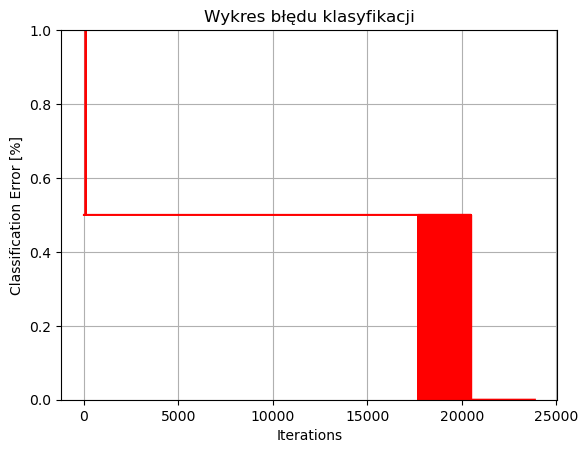

In [76]:
plt.plot(CE,'r')
plt.xlabel('Iterations')
plt.ylabel('Classification Error [%]')
plt.ylim([0, 1])
plt.title('Wykres błędu klasyfikacji')
plt.grid(True)
plt.show()

### Błąd średniokwadratowy MSE

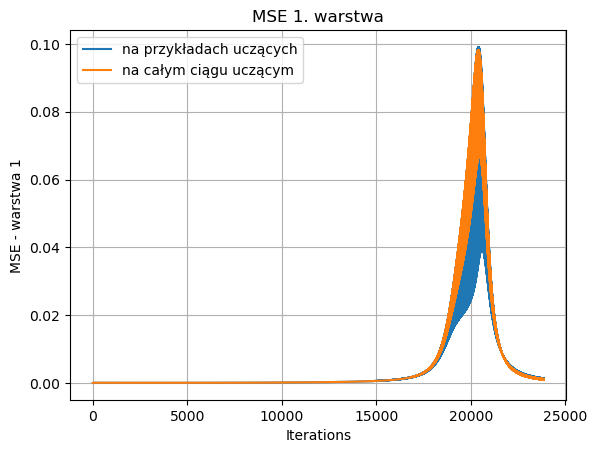

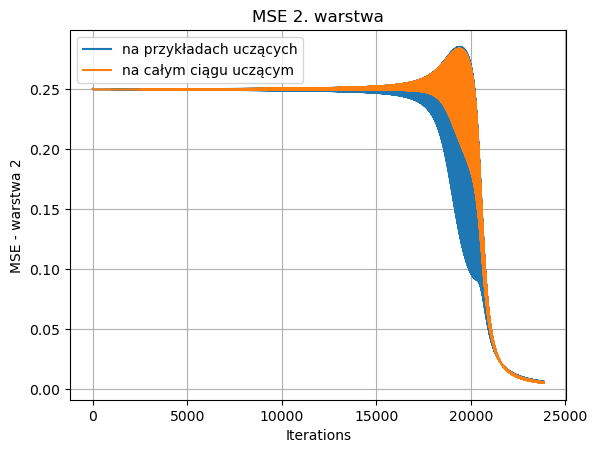

In [77]:
plt.plot(MSE1, label='na przykładach uczących')
plt.plot(MSE1cu, label='na całym ciągu uczącym')
plt.ylabel('MSE - warstwa 1')
plt.xlabel('Iterations')
plt.title('MSE 1. warstwa')
plt.grid(True)
plt.legend()

plt.show()

plt.plot(MSE2, label='na przykładach uczących')
plt.plot(MSE2cu, label='na całym ciągu uczącym')
plt.ylabel('MSE - warstwa 2')
plt.xlabel('Iterations')
plt.title('MSE 2. warstwa')
plt.grid(True)
plt.legend()
plt.show()



### Wagi i bajasy

Wykresy dla 1 warstwy

uwaga: tym samym kolorem na wykresach zaznaczono wagi i bajasy "wchodzące" do tego samego neuronu w warstwie 1.

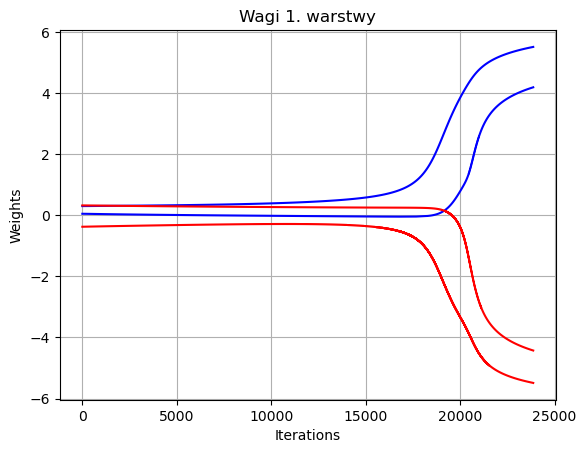

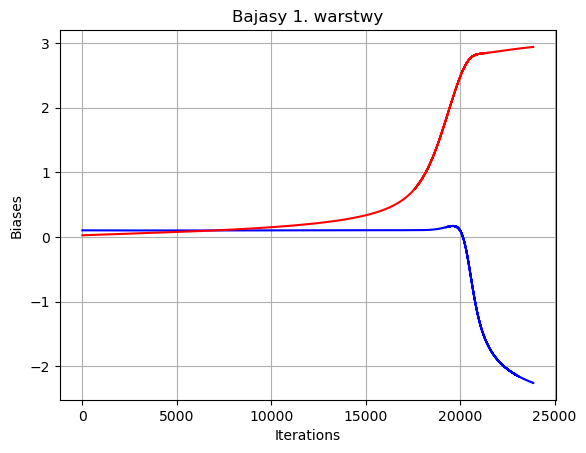

In [78]:
plt.plot([Ws1[n][0]for n in range(0,len(Ws1))],'b')
plt.plot([Ws1[n][1] for n in range(0,len(Ws1))],'r')
plt.xlabel('Iterations')
plt.ylabel('Weights')
plt.title('Wagi 1. warstwy')
plt.grid(True)
plt.show()

plt.plot([[bs1[n][0][0]] for n in range(0,len(bs1))],'b')
plt.plot([[bs1[n][0][1]] for n in range(0,len(bs1))],'r')

plt.xlabel('Iterations')
plt.ylabel('Biases')
plt.title('Bajasy 1. warstwy')
plt.grid(True)
plt.show()

Wykresy dla 2 warstwy

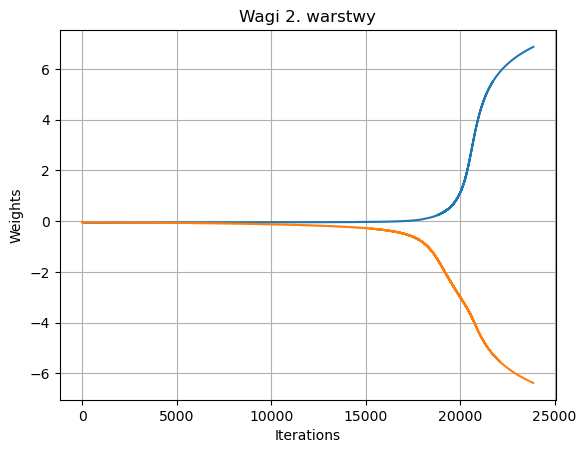

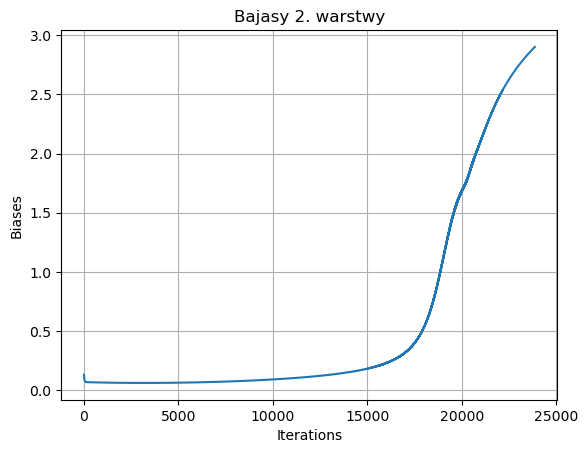

In [79]:
plt.plot([np.concatenate((Ws2[n][0],Ws2[n][1]),axis=0) for n in range(0,len(Ws2))])
plt.xlabel('Iterations')
plt.ylabel('Weights')
plt.title('Wagi 2. warstwy')
plt.grid(True)
plt.show()

plt.plot([bs2[n][0] for n in range(0,len(Ws2))])

plt.xlabel('Iterations')
plt.ylabel('Biases')
plt.title('Bajasy 2. warstwy')
plt.grid(True)
plt.show()

## Żródła
* Publikacja dr. Ciskowskiego "Poznawanie własności sieci neuronowych w środowisku MATLAB": https://dbc.wroc.pl/dlibra/publication/22701/edition/19826?language=pl
* Artykuł Neural Network xor example from scratch (no libs): https://www.codingame.com/playgrounds/59631/neural-network-xor-example-from-scratch-no-libs
* Artykuł Siddhartha Dutta "Implementing the XOR Gate using Backpropagation in Neural Networks": https://towardsdatascience.com/implementing-the-xor-gate-using-backpropagation-in-neural-networks-c1f255b4f20d
* Artykuł Aniruddha Karajgi "How Neural Networks Solve the XOR Problem": https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7
* Poradnik autorstwa Samson Zhang: https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras
* Artykuł Jason Brownlee PhD "A Gentle Introduction to Mini-Batch Gradient Descent and How to Configure Batch Size": https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/
* Wykłady